<img src="gym_churn_intro.jpg" alt="machine learning intro" style="width:900px;height:500px;">

<h1 style= 'font-family:Sabon; font-size:36.0pt;text-align:center;'>Machine Learning To Predict Churn of Gym Customers</h1>

<span style='font-family:Sabon;font-size:24.0pt;'>
    <b>Table of Contents</b>
</span>
<span style='font-family:Sabon;font-size:16.0pt;line-height:1.5'>
    <ul>        
        <li><a href='#intro'>1. Introduction</a></li>
        <li><a href='#libraries'>2. Import Libraries</a></li>
        <li><a href='#func'>3. Define Functions</a></li>
        <li><a href='#import_data'>4. Import Data</a></li>
        <li><a href='#gen_info'>5. General Information</a></li>        
        <ul>
            <li><a href='#gen_conc'>5.1 Conclusion</a></li>
        </ul>
        <li><a href='#preprocessing'>6. Preparing Data for Analysis</a></li>
        <ul>
            <li><a href='#pp_col_tr'>6.1 Column Transformation</a></li>
            <li><a href='#pp_mis'>6.2 Checking for Missing Values</a></li>
            <li><a href='#pp_dup'>6.3 Checking for Duplicated Rows</a></li>
            <li><a href='#pp_dt'>6.4 Datatype Transformation</a></li>
            <li><a href='#pp_conc'>6.5 Conclusion</a></li>
        </ul>
        <li><a href='#EDA'>7. Exploring the Data</a></li>
        <ul>
            <li><a href='#EDA_stats'>7.1 Looking at the Statistics</a></li>
            <li><a href='#EDA_churn'>7.2 Features Statistics by Churn</a></li>
            <li><a href='#EDA_visuals'>7.3 Visualizing the Features by Churn</a></li> 
            <li><a href='#EDA_mcl'>7.4 Testing for Multicollinearity</a></li>
            <li><a href='#EDA_conc'>7.5 Conclusion</a></li>
        </ul>
        <li><a href='#ML'>8. Using Machine Learning to Determine Chance of Churn</a></li>
            <ul>
                <li><a href='#ML_predict'>8.1 Training And predicting with Logistic Regression and Random Forest</a></li>
                <li><a href='#ML_conc'>8.2 Conclusion</a></li>
            </ul>    
        <li><a href='#ML_clustering'>9. Using Unsupervised Learning to Identify Customer Clusters</a></li>
            <ul>
                <li><a href='#ML_cluster_visualize'>9.1 Visualizing the Features by Cluster</a></li>
                <li><a href='#ML_cluster_conc'>9.2 Conclusion</a></li>
            </ul>    
        <li><a href='#overall_conc'>10. Overall Conclusions and Recommendations</a></li>
            <ul>
                <li><a href='#overall_rec'>10.1 Recommendations</a></li>
            </ul>   
    </ul>
</span>

<a id="intro"></a>
<h2>Introduction</h2>

<span style='font-family:sabon;font-size:13pt;'>
In this project we take the part of an analyst for a gym chain that is seeking to develop a new customer interaction strategy.<br><br>
    We have received a dataset compelete with a digitized profile of 4000 customers, which we will analyze and use to construct our recommendations.<br>
To achieve this goal, we will be using machine learning algorithms to predict which customers are at risk of leaving and what factors contribute to that decision.<br>
We will also attempt to identify customer groups using clustering algorithms and produce further recommendations based upon the resulting profiles.
    </span>

<a id="libraries"></a>
<h2>Import Libraries</h2>

In [6]:
!pip -q install sidetable 
!pip -q install seaborn --upgrade 

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import sidetable as stb
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
import warnings

In [8]:
warnings.filterwarnings('ignore')

<a id="func"></a>
<h2>Define Functions</h2>

In [9]:
def zn_values(df):
    """
    This function accepts a dataframe 
    and produces a report of the presence
    of 0 values in each column.
    
    Parameters:
        df: the pandas dataframe which columns you want to check
    
    Returns:
        report of 0 value entries in each column
    """
    #loop over each column and count how many 0 values it contains
    for col in df.columns:
        z_values = df[df[col] == 0].shape[0]

        print('Column name: {}\nValues that equal 0: {}\n'.format(
            col,z_values
        )
             )
        
def dup_display(df_list):
    """
    This function returns the
    number of duplicated rows
    in each df in the list
        
    Parameters:
        df_list: list of pandas dataframes
    
    Returns:
        report of duplicated rows in each df listed
        report of duplicates diversity in each df listed
    
    """
    alias= 0
    for df in df_list:
        dup_sum = df.duplicated().sum()
        dup_perc = dup_sum / df.shape[0]
        try:
            df_name = df.name
        except:
            df_name = 'Unknown Dataframe {}'.format(alias)
            alias += 1
        
        print('{} :\nDuplicated Values: {}\n% duplicated rows: {:.2%}\n'.format(
            df_name,dup_sum,dup_perc
        )
             )
        print('Duplicates distribution diversity:')
        for col in df[df.duplicated()].columns:
            print('{} : {}'.format(
                col,df[df.duplicated()][col].nunique()
        )
             )
        print()
def val_counts(df_list, n=5):
    
    """
    This function returns a dataframe's 
    column values and their value counts
    in absolute and relative values

    Parameters:
        df_list(list): a list of one or more dataframes.
                       Columns should be specified for
                       the columns which value counts you need.
        n (int): number of rows to report for each column. (Default = 5)
    Returns:
        A report of the first highest n value counts(absolute and relative) in each specified column
        for each df in the df_list.

    """
    for df in df_list:
        try:
            df_name = df.name
        except:
            df_name = 'Dataframe {}'.format(df_list.index(df))
        print('Top {} Value Counts for {} :\n'.format(n,df_name))
        for column in df.columns:
            print('\nColumn: {}'.format(column))
            val_normalized = df[column].value_counts(normalize=True).to_frame()
            val_absolute = df[column].value_counts().to_frame()
            val_final = val_absolute.merge(val_normalized, right_index=True, left_index=True)
            val_final.columns = ['{}'.format(column+' '+'absolute'),'{}'.format(column+' '+'relative')]
            display(val_final.head())
            
def metric_calc(metric_name, y_test, predictions=None, proba=None):
    """
    This function returns the result
    of a metric calculation held in
    its function dictionary

    Parameters:
        metric_name(str): 
            a string that corresponds to
            one of the keys in the function dictionary
            
        y_test (pandas series): 
            array of target variable test data
        
        predictions (numpy.ndarray):
            result of prediction of test data
        
        proba (numpy.ndarray):
            results of probability prediction of test data
    Returns:
        Result of metric calculation

    """
    function_dict = dict(accuracy= 'Accuracy: {:.2f}'.format(accuracy_score(y_test,predictions)),
                        percision = 'Percision: {:.2f}'.format(precision_score(y_test,predictions)),
                        recall = 'Recall: {:.2f}'.format(recall_score(y_test,predictions)),
                         F1 = 'F1 Score: {:.2f}'.format(f1_score(y_test, predictions)), 
                        )
    if metric_name == 'ROC_AUC':
        return(print('ROC AUC: {:.2f}'.format(roc_auc_score(y_test, proba))))
    return(print(function_dict[metric_name]))

def classification_prediction(
    m,
    X_train,
    X_test,
    y_train,
    y_test,
    class_metrics= dict(
        accuracy=True, percision= True, recall= True, F1= True
        ),
    proba_metrics = False
    ):
    """
    This function trains classification models
    and prints out a report of metrics
    and feature importance ranking

    Parameters:
        m(list): 
            a list of models to train
        
        X_train(pandas series):
            array of features
            
        X_test(pandas series):
            array of features for testing
        
        y_test (pandas series): 
            array of target variable test data
        
        class_metrics (dict):
            dictionary of classification metrics to calculate
        
        proba_metrics (bool):
            if True, probability prediction will be calculated
            
    Returns:
        report of model efficiency using classification metrics.
        report of feature importance.

    """
    #train model and predict
    for model in m:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        #print report
        print('Model: {}\n'.format(model.__class__.__name__))
        for key,value in class_metrics.items():
            if value == True and type(model) in [type(LogisticRegression()),type(RandomForestClassifier()),type(DecisionTreeClassifier())]:
                metric_calc(key, y_test, predictions)
                
        if proba_metrics == True:
            probabilities = model.predict_proba(X_test)[:,1]
            metric_calc('ROC_AUC', y_test,predictions, proba=probabilities)
            
        #display feature importance dataframe
        if type(model) in [type(RandomForestClassifier()),type(DecisionTreeClassifier())]:
            importances = model.feature_importances_
            imp_df = pd.DataFrame(
                data=pd.Series(importances).values, index= X.columns, columns= ['importance']
                )
            imp_df.sort_values('importance', ascending=False, inplace=True)
            display(imp_df.head())
            
        elif type(model) in [type(LogisticRegression())]:
            feature_weights  = model.coef_
            weight_0 = model.intercept_
            imp_df = pd.DataFrame(data=pd.Series(feature_weights[0]).values, index= X.columns, columns= ['importance'])
            imp_df = abs(imp_df).sort_values('importance', ascending= False)
            display(imp_df.head())
        print()
        
        #display feature importance plot
        fig, ax = plt.subplots(figsize=(12,10))
        imp_df.plot.bar(ax=ax)
        ax.set_title("{} Model Feature importances using MDI".format(model.__class__.__name__))
        ax.set_ylabel("Mean decrease in impurity")
        fig.tight_layout()
        plt.show()

<a id="import_data"></a>
<h2>Import Data</h2>

In [10]:
#load data
gym_raw = pd.read_csv('gym_churn_us.csv')

#define df name for reference
gym_raw.name = 'gym raw'

<a id="gen_info"></a>
<h2>General Information</h2>

<span style='font-family:sabon;font-size:13pt;'>
    <b>The dataset contains the following fields:</b><br><br>
    <b>Churn</b> — the fact of churn for the month in question<br><br>
<b>User data for the preceding month:</b><br><br>
<b>gender</b><br>
<b>Near_Location</b> — whether the user lives or works in the neighborhood where the gym is located.<br>
<b>Partner</b> — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers).<br>
<b>Promo_friends</b> — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership).<br>
<b>Phone</b> — whether the user provided their phone number.<br>
<b>Age</b> - Users age.<br>
<b>Lifetime</b> — the time (in months) since the customer first came to the gym.<br>
Data from the log of visits and purchases and data on current membership status.<br>
<b>Contract_period</b> — 1 month, 3 months, 6 months, or 1 year.<br>
<b>Month_to_end_contract</b> — the months remaining until the contract expires.<br>
<b>Group_visits</b> — whether the user takes part in group sessions.<br>
<b>Avg_class_frequency_total</b> — average frequency of visits per week over the customer's lifetime.<br>
<b>Avg_class_frequency_current_month</b> — average frequency of visits per week over the preceding month.<br>
<b>Avg_additional_charges_total</b> — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.<br>
    </span>

In [11]:
gym_raw.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [12]:
#display sample data
gym_raw.sample(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
1348,0,1,1,1,1,12,1,34,32.950872,10.0,4,1.764396,1.705305,0
3989,0,1,1,0,1,6,1,30,172.683294,5.0,6,2.225015,2.267794,0
1475,1,1,1,1,1,12,1,29,187.011986,11.0,4,1.361240,1.490380,0
879,1,1,0,0,1,1,0,26,132.305823,1.0,0,0.744655,0.366327,1
2038,1,1,1,1,1,1,0,34,153.967808,1.0,1,4.016065,3.846316,0


In [13]:
#display preliminary statistical info
gym_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


In [14]:
#produce value counts for each column using predefined function
val_counts([gym_raw])

Top 5 Value Counts for gym raw :


Column: gender


,gender absolute,gender relative
1,2041,0.51025
0,1959,0.48975



Column: Near_Location


,Near_Location absolute,Near_Location relative
1,3381,0.84525
0,619,0.15475



Column: Partner


,Partner absolute,Partner relative
0,2053,0.51325
1,1947,0.48675



Column: Promo_friends


,Promo_friends absolute,Promo_friends relative
0,2766,0.6915
1,1234,0.3085



Column: Phone


,Phone absolute,Phone relative
1,3614,0.9035
0,386,0.0965



Column: Contract_period


,Contract_period absolute,Contract_period relative
1,2207,0.55175
12,960,0.24000
6,833,0.20825



Column: Group_visits


,Group_visits absolute,Group_visits relative
0,2351,0.58775
1,1649,0.41225



Column: Age


,Age absolute,Age relative
29,468,0.11700
30,457,0.11425
28,447,0.11175
31,434,0.10850
27,378,0.09450



Column: Avg_additional_charges_total


,Avg_additional_charges_total absolute,Avg_additional_charges_total relative
14.227470,1,0.00025
17.082321,1,0.00025
278.204461,1,0.00025
120.457631,1,0.00025
130.711299,1,0.00025



Column: Month_to_end_contract


,Month_to_end_contract absolute,Month_to_end_contract relative
1.0,2207,0.55175
6.0,645,0.16125
12.0,524,0.13100
11.0,181,0.04525
5.0,130,0.03250



Column: Lifetime


,Lifetime absolute,Lifetime relative
1,843,0.21075
2,610,0.15250
3,490,0.12250
0,487,0.12175
4,383,0.09575



Column: Avg_class_frequency_total


,Avg_class_frequency_total absolute,Avg_class_frequency_total relative
0.000000,88,0.02200
0.020398,1,0.00025
2.182034,1,0.00025
1.976985,1,0.00025
1.671952,1,0.00025



Column: Avg_class_frequency_current_month


,Avg_class_frequency_current_month absolute,Avg_class_frequency_current_month relative
0.000000,181,0.04525
1.328134,1,0.00025
2.628932,1,0.00025
1.797684,1,0.00025
1.524367,1,0.00025



Column: Churn


,Churn absolute,Churn relative
0,2939,0.73475
1,1061,0.26525


<a id="gen_conc"></a>
<h3>Conclusion</h3>

<span style='font-family:sabon;font-size:13pt;'>
   From checking the general info and statistics of the data we find:<br><br>
   <ul>
      <li>The table contains <b>4000</b> rows, each containing a record of individual users data. The record details profiling information such as gender,age and relative location, along with the users activity with regards to the business.</li>
      <li>Column names are not optimal, they will be transformed to lower case and changed for ease of use.</li>
      <li>Month_to_end_contract contains monthly units while having the datatype set to float, we will change it to int during preprocessing.</li>
   </ul>
</span>

<a id="preprocessing"></a>
<h2>Preparing Data for Analysis</h2>

<a id="pp_col_tr"></a>
<h3>Column Transformation</h3>

In [15]:
#columns lower case rename
gym_raw.columns = [col.lower() for col in gym_raw.columns]

#observe the change
gym_raw.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

<a id="pp_mis"></a>
<h3>Checking for Missing Values</h3>

In [16]:
#missing values report
gym_raw.stb.missing(style=True)

,missing,total,percent
gender,0,"4,000",0.00%
near_location,0,"4,000",0.00%
partner,0,"4,000",0.00%
promo_friends,0,"4,000",0.00%
phone,0,"4,000",0.00%
contract_period,0,"4,000",0.00%
group_visits,0,"4,000",0.00%
age,0,"4,000",0.00%
avg_additional_charges_total,0,"4,000",0.00%
month_to_end_contract,0,"4,000",0.00%


<a id="pp_dup"></a>
<h3>Checking for Duplicates</h3>

In [17]:
#display duplicated rows using predefined function
dup_display([gym_raw])

gym raw :
Duplicated Values: 0
% duplicated rows: 0.00%

Duplicates distribution diversity:
gender : 0
near_location : 0
partner : 0
promo_friends : 0
phone : 0
contract_period : 0
group_visits : 0
age : 0
avg_additional_charges_total : 0
month_to_end_contract : 0
lifetime : 0
avg_class_frequency_total : 0
avg_class_frequency_current_month : 0
churn : 0



<a id="pp_dt"></a>
<h3>Datatype Transformation</h3>

In [18]:
#set datatype as int
gym_raw['month_to_end_contract'] = gym_raw['month_to_end_contract'].astype(int)

<a id="pp_conc"></a>
<h3>Conclusion</h3>

<span style='font-family:sabon;font-size:13pt;'>
   We began preprocessing of the data and performed several transformations of it:<br><br>
   <ul>
      <li>We renamed the columns to have lower case letters.</li>
      <li>We looked for missing values in the data and found none.</li>
      <li>We looked for duplicate rows in the data and found none.</li>
      <li>We changed the month_to_end_contract column datatype from float to int.</li>
   </ul>
</span>

<a id='EDA'></a>
<h2>Exploring the Data</h2>

<a id='EDA_stats'></a>
<h3>Looking at the Statistics</h3>

In [19]:
#divide the columns for statistical preview
non_binary = [column for column in gym_raw.columns if gym_raw[column].value_counts().shape[0] > 2]
binary = [column for column in gym_raw.columns if gym_raw[column].value_counts().shape[0] == 2]

In [20]:
#display statistical data for both data kinds
for columns in [non_binary, binary]:
    display(gym_raw[columns].describe().T)

,count,mean,std,min,25%,50%,75%,max
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000
lifetime,4000.0,3.724750,3.749267,0.000000,1.000000,3.000000,5.000000,31.000000
avg_class_frequency_total,4000.0,1.879020,0.972245,0.000000,1.180875,1.832768,2.536078,6.023668
avg_class_frequency_current_month,4000.0,1.767052,1.052906,0.000000,0.963003,1.719574,2.510336,6.146783


,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.51025,0.499957,0.0,0.0,1.0,1.0,1.0
near_location,4000.0,0.84525,0.361711,0.0,1.0,1.0,1.0,1.0
partner,4000.0,0.48675,0.499887,0.0,0.0,0.0,1.0,1.0
promo_friends,4000.0,0.30850,0.461932,0.0,0.0,0.0,1.0,1.0
phone,4000.0,0.90350,0.295313,0.0,1.0,1.0,1.0,1.0
group_visits,4000.0,0.41225,0.492301,0.0,0.0,0.0,1.0,1.0
churn,4000.0,0.26525,0.441521,0.0,0.0,0.0,1.0,1.0


<span style='font-family:sabon;font-size:13pt;'>
    <b><u>Results:</u></b><br>
    <ul>
        <li>Genders are split evenly.</li>
        <li>Most users appear to live close to the gym - an average 85% with STD 36%</li>
        <li>partnered vs non-partnered are split evenly</li>
        <li>most customers did not join via the friend promotion - an average of 31% did, with a STD of 46%</li>
        <li>Most customers registered their phone when joining.</li>
        <li>41% of customers make group visits to the gym.</li>
        <li>26% of the customers in the dataset churned in the last month</li>
        <li>The contract period averages at 4.7 with at least 50% of the customers having a 1 month contract.</li>
        <li>user ages are 18 to 41, averaging at 29 with a STD of 3.26</li>
    </ul>
</span>

<a id='EDA_churn'></a>
<h3>Features Statistics by Churn</h3>

In [21]:
#display feature average values per churn group
gym_raw.groupby('churn').mean().T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


<span style='font-family:sabon;font-size:13pt;'>
    <b><u>Results:</u></b><br>
    <ul>
        From the results above we surmise that customers who did not churn out this month:
        <li>tend to belong to a partnered company</li>
        <li>twice as many of them have joined through friends than those who churned out.</li>
        <li>tend to have a longer contract.</li>
        <li>more of them participate in group visits than those who churned out.</li>
        <li>tend to have more additional charges.</li>
        <li>attend 2 classes a month.</li>
    </ul>
</span>

<a id='EDA_visuals'></a>
<h3>Visualizing the Features by Churn</h3>

<span style='font-family:sabon;font-size:13pt;'>
    Here we will visualize the data features by their fact of Churn.<br>
    For example, for gender, we will look at each gender (here defined as 0 and 1) and see for each one, their count of customers who churned vs those who did not churn.
    </span>

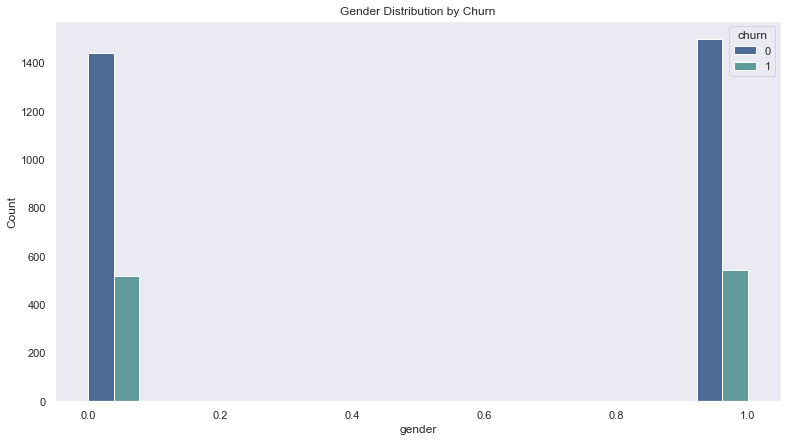

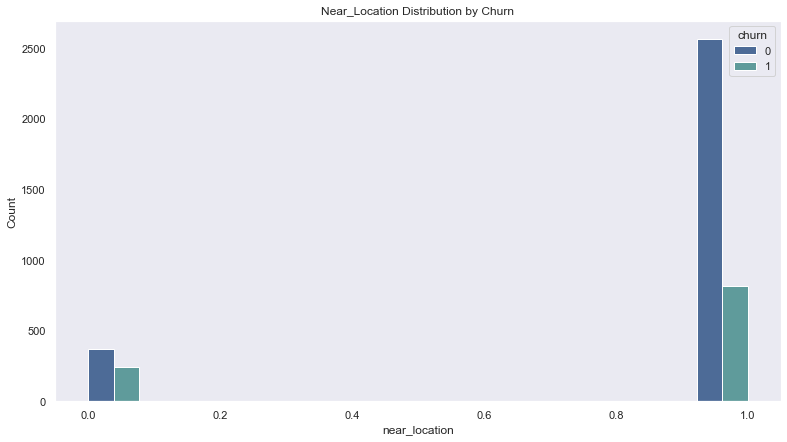

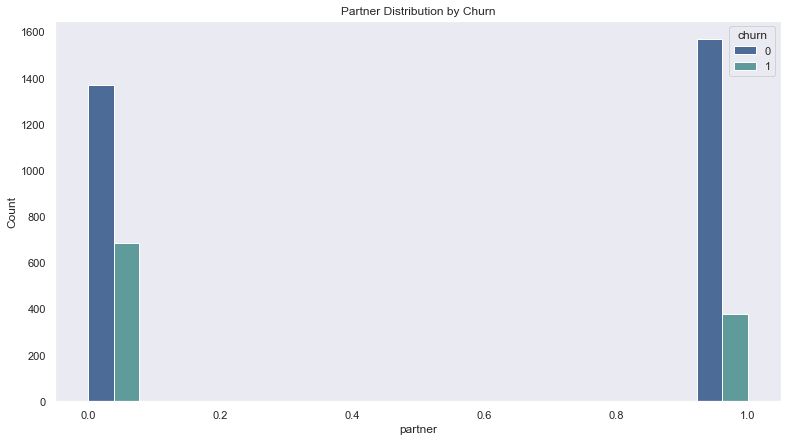

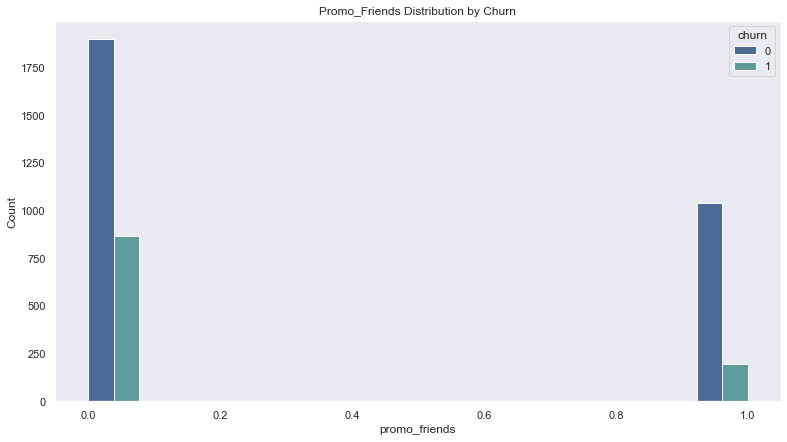

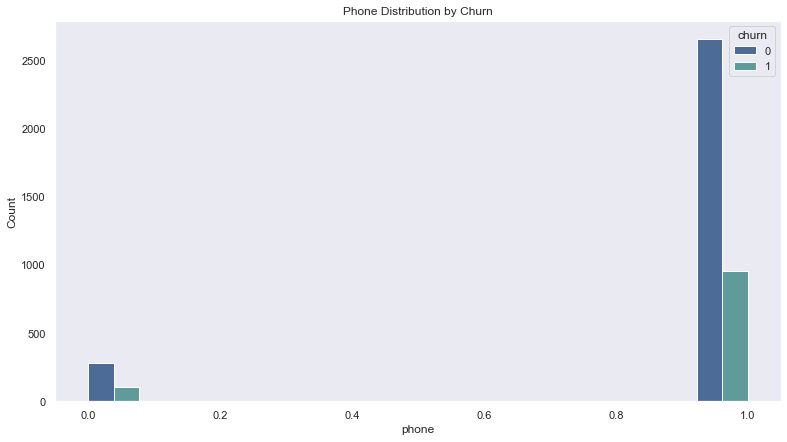

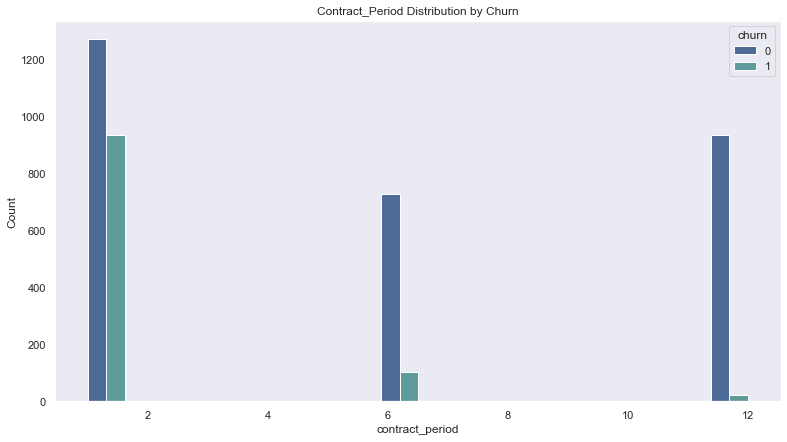

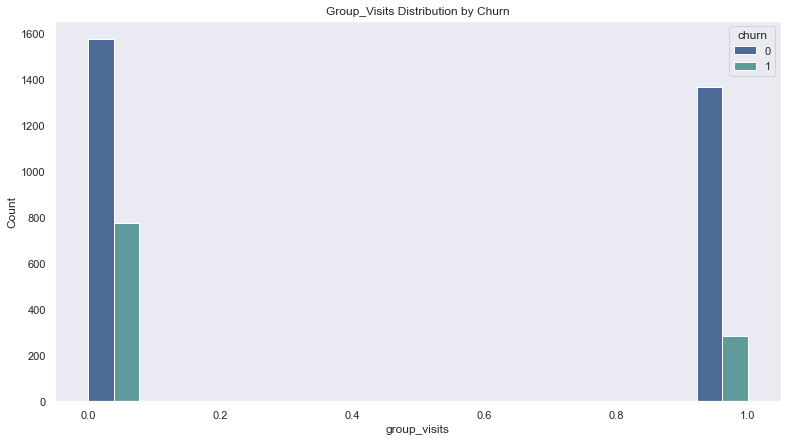

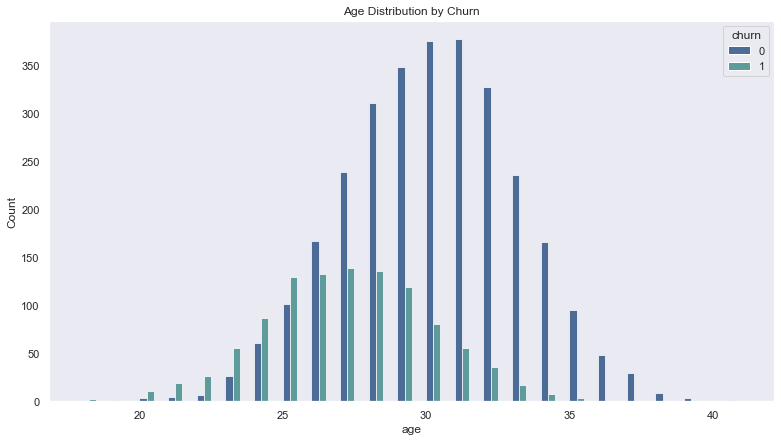

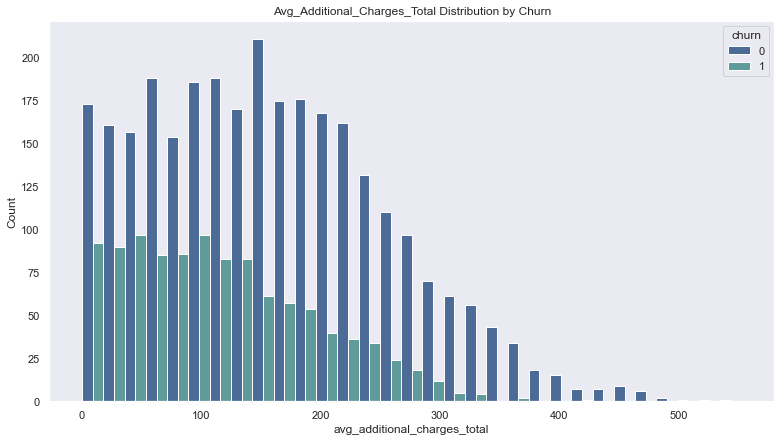

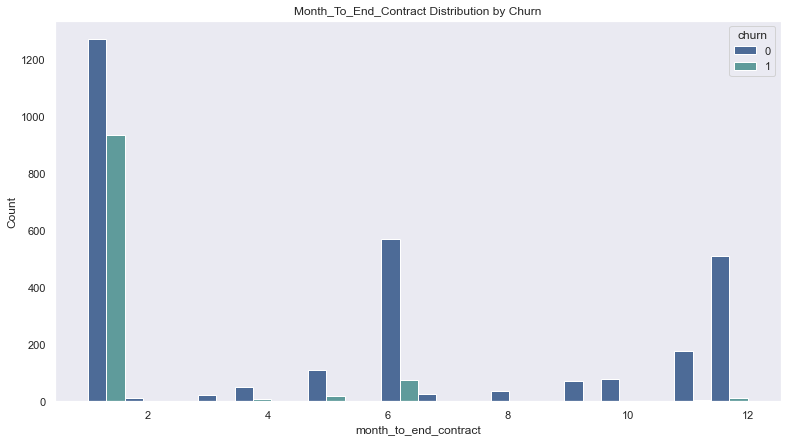

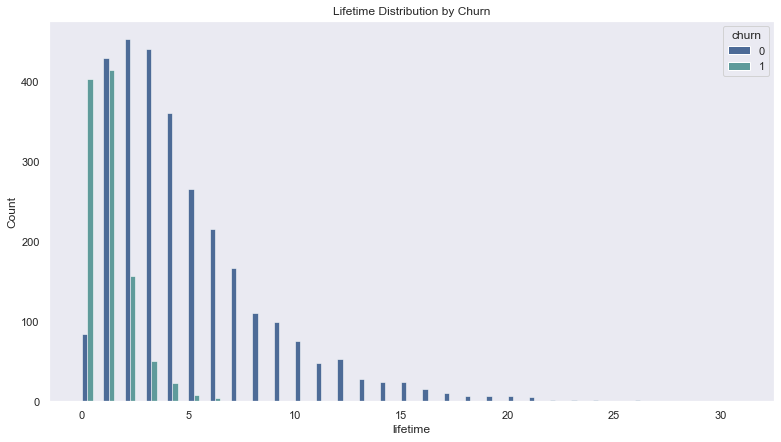

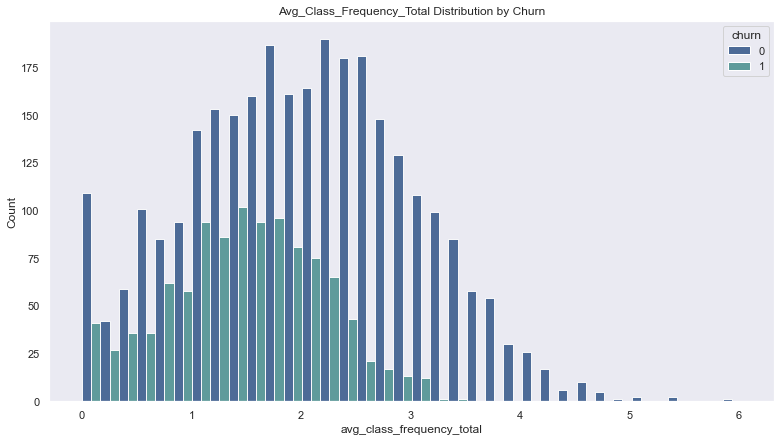

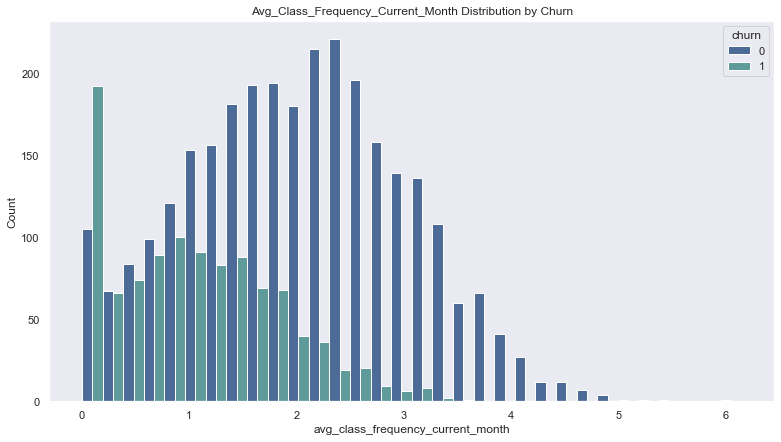

In [22]:
#produce visualization for each feature split by churn
#sns.set_style('darkgrid')
sns.set_theme(style='dark', palette='gist_earth')
for col in gym_raw.drop('churn', axis=1).columns:
    fig, ax = plt.subplots(figsize=(13,7))
    sns.histplot(x=col, data=gym_raw, hue='churn', multiple='dodge').set_title(f'{col.title()} Distribution by Churn')
    plt.show()

<span style='font-family:sabon;font-size:13pt;'>
    <b><u>Results:</u></b><br>
    <ul>
        <li>All comparisons save for Phone and Gender seem to show significant churn discrapency.</li>
    </ul>
</span>

<a id='EDA_mcl'></a>
<h3>Testing for Multicollinearity</h3>

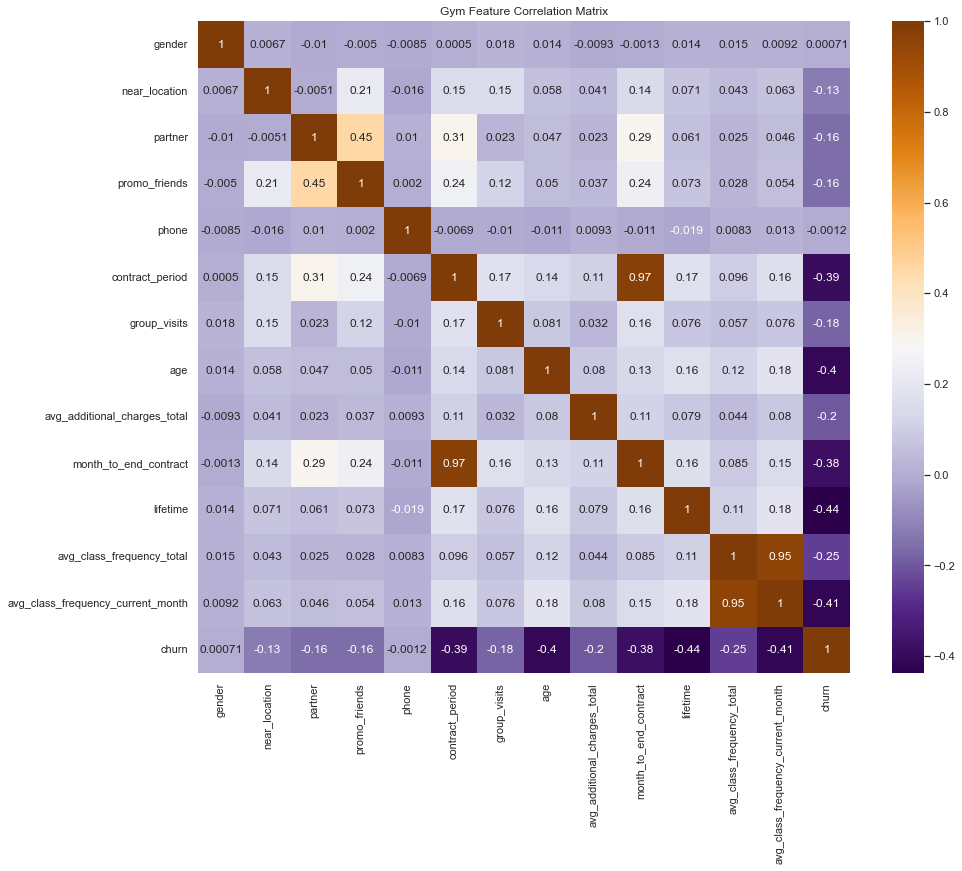

In [23]:
#plot correlation matrix for dataset features
gym_corr = gym_raw.corr()
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(
    gym_corr, 
    annot=True,
    square= True,
    cmap='PuOr_r'
    ).set_title('Gym Feature Correlation Matrix')

plt.show()

<span style='font-family:sabon;font-size:13pt;'>
    <b><u>Results:</u></b><br>
    We can see various correlations between the features:
    <ul>
        <li>We can see a clear multicollinearity between avg_class_frequency_current_month and avg_class_frequency total</li>
        <li>as well as between contract_period and month_to_end_contract</li>
        <li>We will remove the feature that has less correlation with the target variable (avg_class_frequency_total)</li>
        <li>For the other multicollinearity, the correlation is very similar, but we will choose to remove the month_to_end_contract because it is more difficult to one-hot encode it as opposed to contract_period which has 3 unique values.</li>
    </ul>
</span>

<a id='EDA_conc'></a>
<h3>Conclusion</h3>

<span style='font-family:sabon;font-size:13pt;'>
    <b>We took a look at the statistical data of the features available and visualized them.<br> We arrived at several conclusions:</b><br>
    <ul>
        <li>user ages are 18 to 41, averaging at 29</li>
        <li>The gender and Phone features don't seem to affect churn.</li>
        <li>partnered vs non-partnered are split evenly, but for partnered customers the churn rate was lower</li>
        <li>most customers did not join via the friend promotion - but from those who did, the churn rate was low.</li>
        <li>41% of customers make group visits to the gym and for those customers the churn rate is low.</li>
        <li>The majority of the customers have a 1 month contract and the churn rate lowers as the contracts are lenghtier.</li>
        <li>We detected multicollinearity between avg_class_frequency_current_month and avg_class_frequency total</li>
        <li>We detected multicollinearity between contract_period and month_to_end_contract</li>   
    </ul>
</span>

<a id='ML'></a>
<h2>Using Supervised Machine Learning to Determine Chance of Churn</h2>

<a id='ML_predict'></a>
<h3>Training And predicting with Logistic Regression and Random Forest</h3>

<span style='font-family:sabon;font-size:13pt;'>
    We will start by removing features with multicollinearity and standardize our data.<br>
    Then we will train the two models to predict churn.
    </span>

In [24]:
#drop columns
gym_mod = gym_raw.drop(['avg_class_frequency_total', 'month_to_end_contract'], axis=1)

#one hot encode the contract_period feature
gym_mod_onehot = pd.get_dummies(gym_mod, columns=['contract_period'])


Model: LogisticRegression

Accuracy: 0.90
Percision: 0.79
Recall: 0.82
F1 Score: 0.80
ROC AUC: 0.96


,importance
lifetime,3.926871
avg_class_frequency_current_month,1.330922
age,1.104315
contract_period_12,0.730192
contract_period_1,0.700143


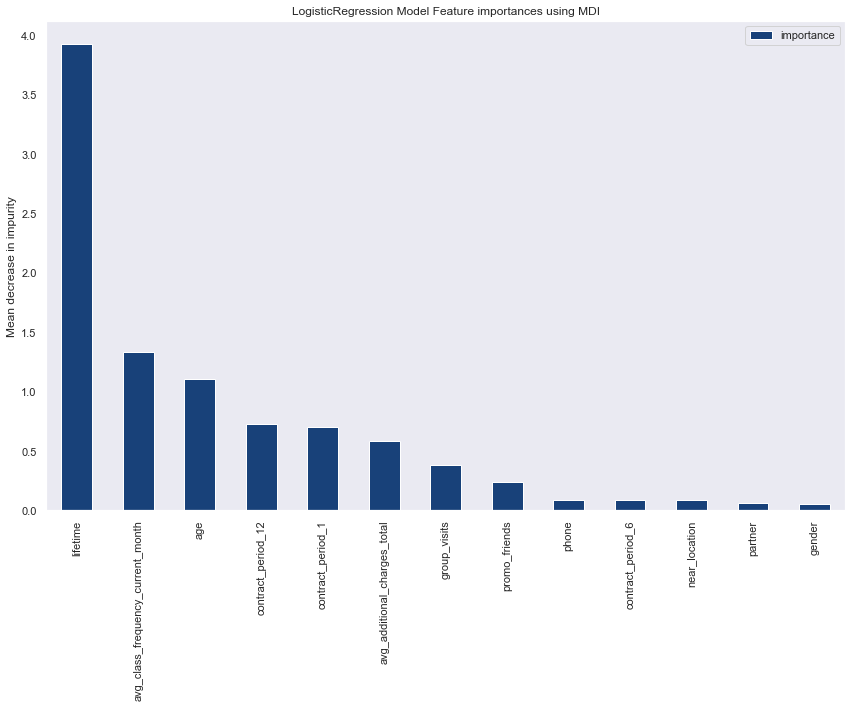

Model: RandomForestClassifier

Accuracy: 0.89
Percision: 0.79
Recall: 0.74
F1 Score: 0.77
ROC AUC: 0.95


,importance
lifetime,0.310674
avg_class_frequency_current_month,0.212764
age,0.138592
avg_additional_charges_total,0.123197
contract_period_1,0.080181


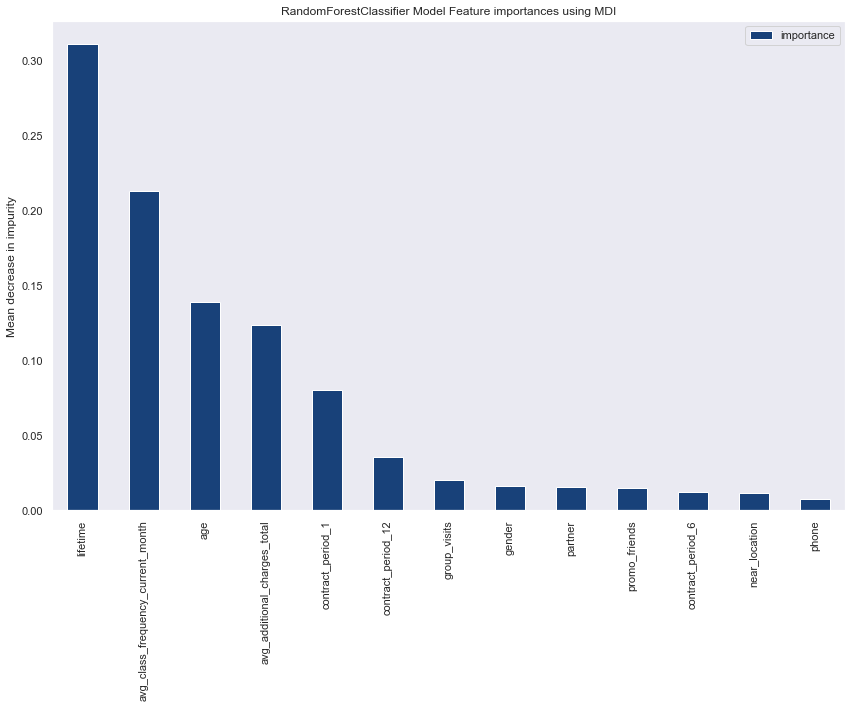

In [25]:
#define feature and target variable
X= gym_mod_onehot.drop('churn', axis=1)
y= gym_mod_onehot['churn']

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#standardize features
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

#define models to train
models = [LogisticRegression(random_state = 0),RandomForestClassifier(random_state = 0)]
#train and predict
classification_prediction(models, X_train_st, X_test_st, y_train, y_test, proba_metrics=True)

<a id='ML_conc'></a>
<h3>Conclusion</h3>

<span style='font-family:sabon;font-size:13pt;'>
    <b>We trained two classifier models, calculated metrics for their performance and examined the feature importance that each model produced. our results show:</b><br>
    <ul>
        <li>The Logistic Regression model performed better on all metrics than the RandomForest model</li>
        <li>The top feature importances selected by both models were almost identical</li>
        <li>The top 5 features by importance for the Logistic Regression model were:<br>
            <b>lifetime<br>avg_class_frequency_current_month<br>age<br>contract_period_12<br>contract_period_1</b></li>
        <li>The top 5 features by importance for the RandomForest model were:<br>
            <b>lifetime<br>avg_class_frequency_current_month<br>age<br>avg_additional_charges_total<br>contract_period_1</b></li>  
    </ul>
</span>

<a id='ML_clustering'></a>
<h2>Using Unsupervised Learning to Identify Customer Clusters</h2>

<span style='font-family:sabon;font-size:13pt;'>
Here we will use K-Means clustering to group the data into distinct clusters.
    </span>

In [26]:
#initiate scaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)
#create links between the objects
linked = linkage(X_sc, method = 'ward') 

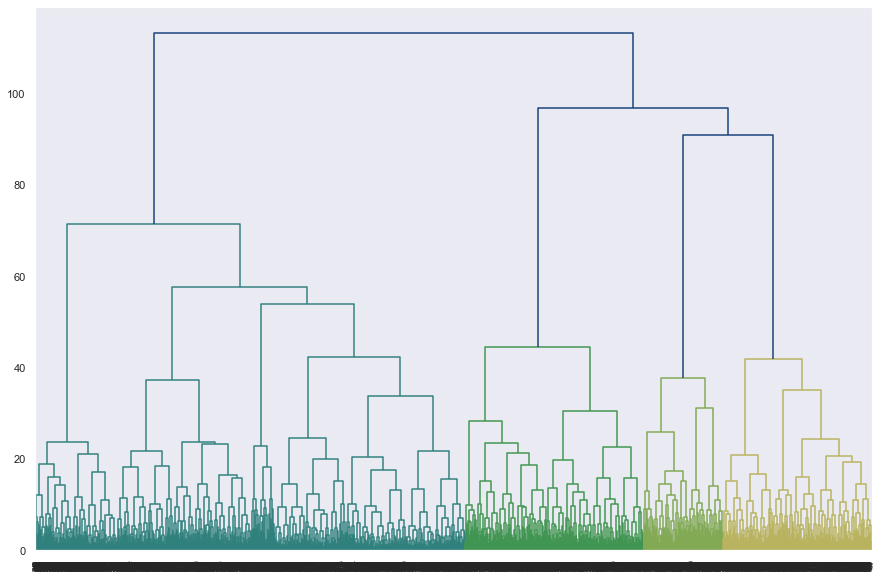

In [27]:
#plot dendogram
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show()

<span style='font-family:sabon;font-size:13pt;'>
    <b><u>Results:</u></b><br>
    The dendogram suggests 4 distinct clusters.<br>
    We will use 5 clusters for our model.
</span>

In [28]:
#define n clusters
km = KMeans(n_clusters = 5, random_state= 0)

#train model
labels = km.fit_predict(X_sc)

In [29]:
#assign cluster column
gym_mod_onehot['cluster_km'] = labels

<a id='ML_cluster_visualize'></a>
<h3>Visualize the Features by Cluster</h3>

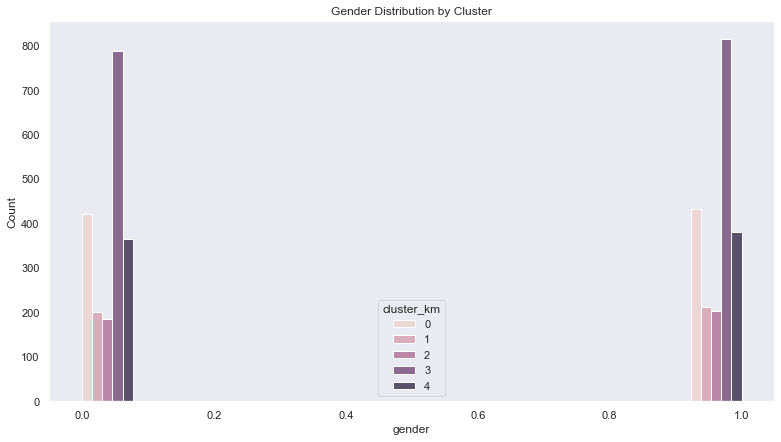

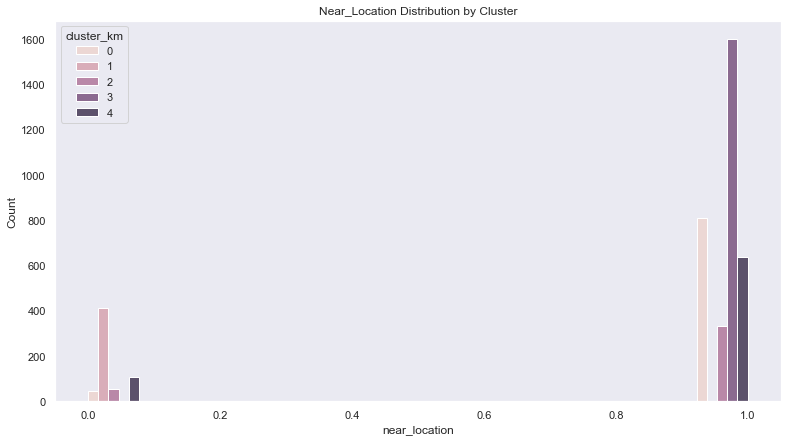

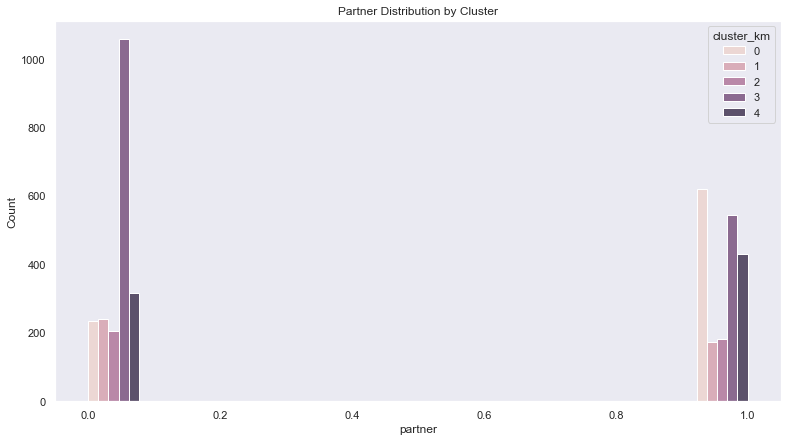

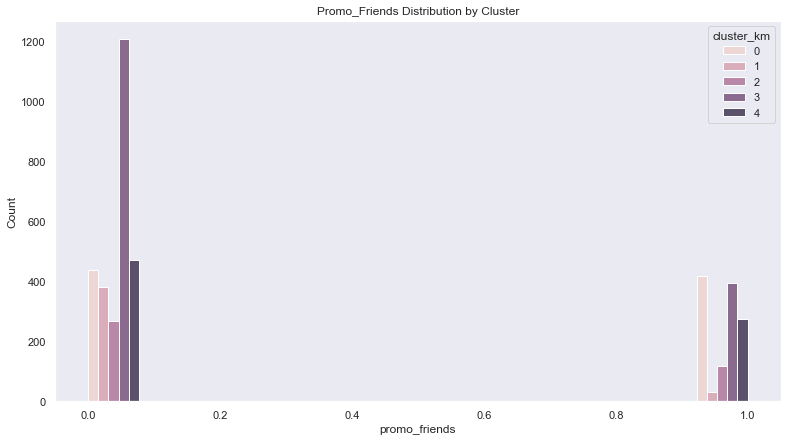

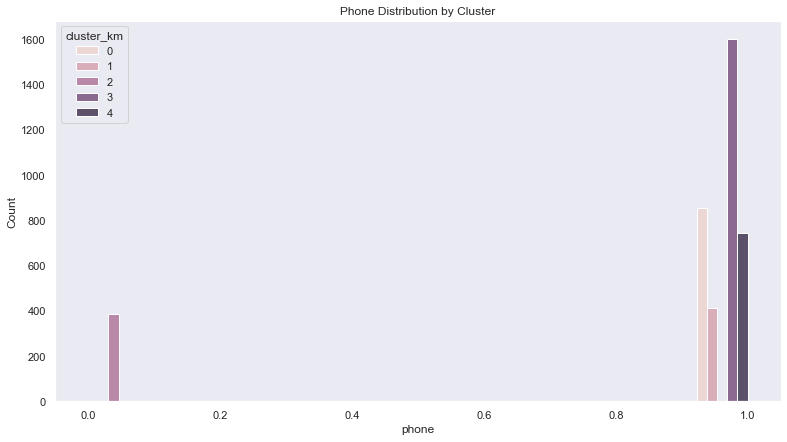

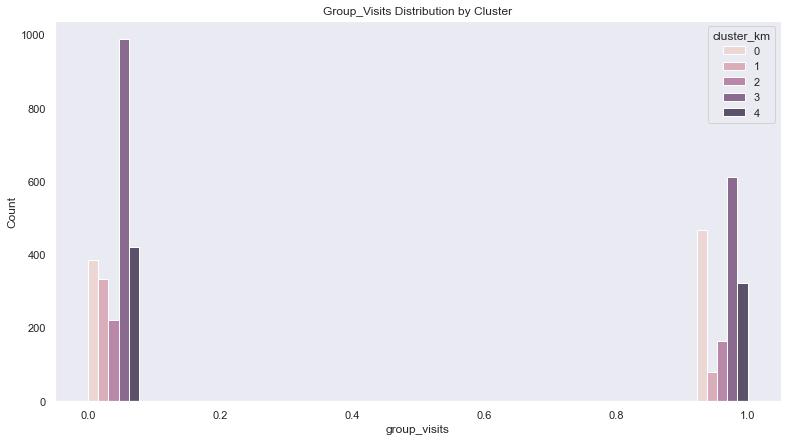

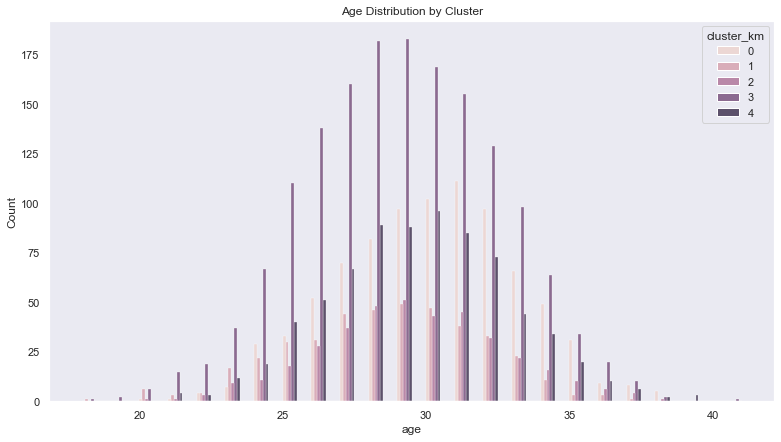

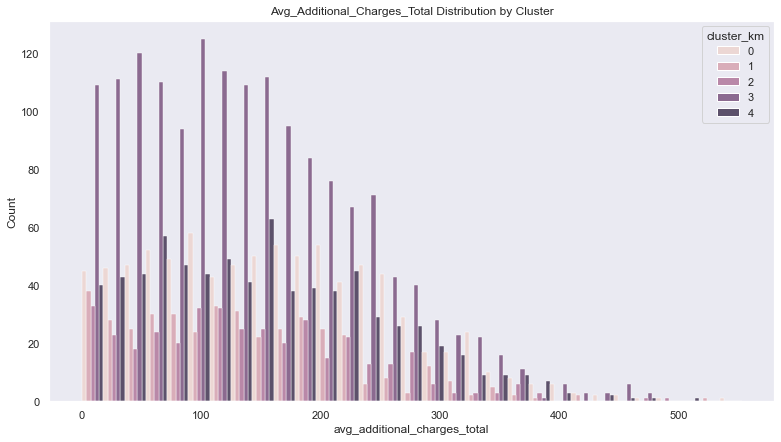

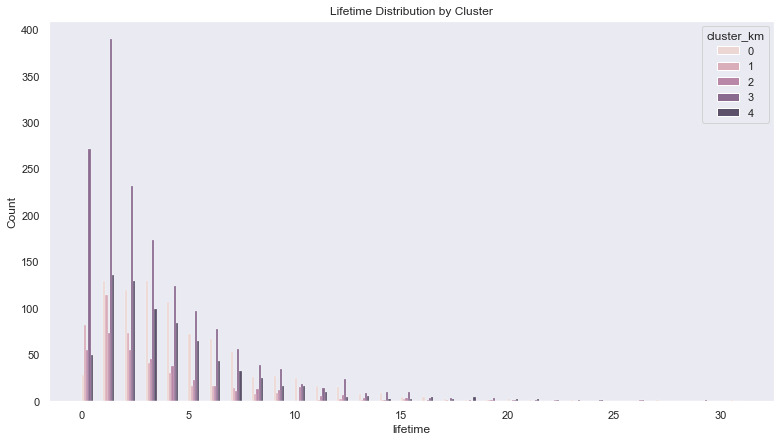

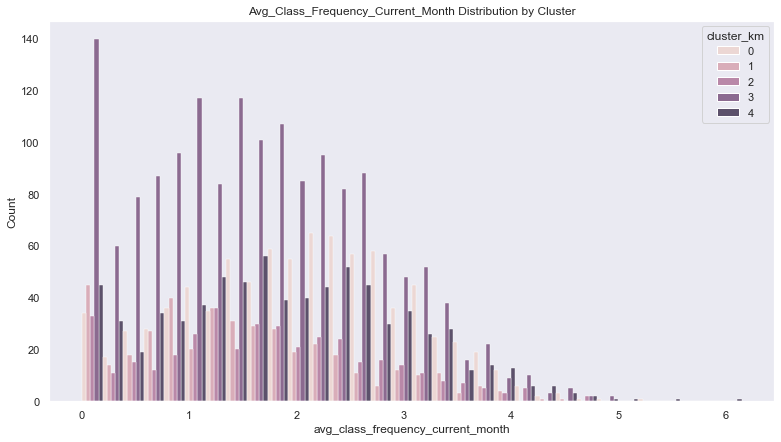

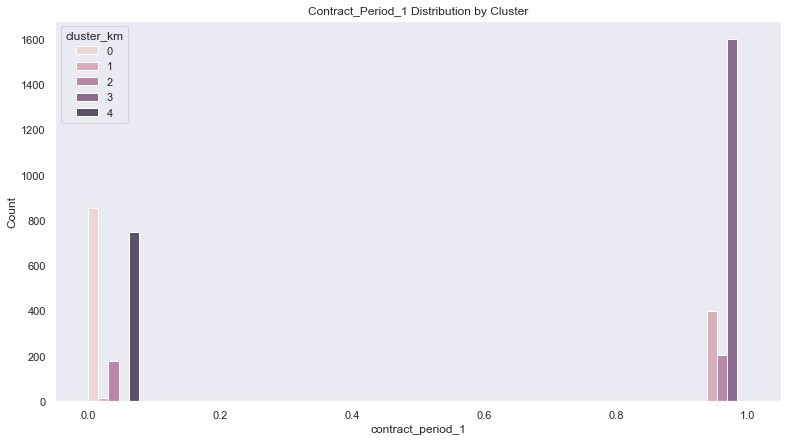

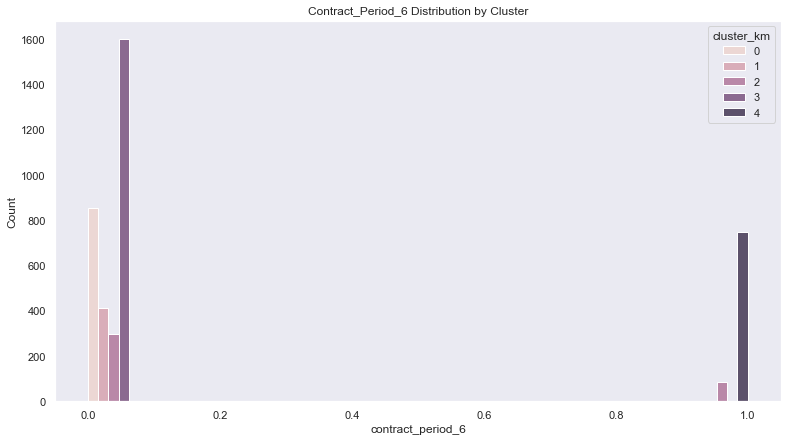

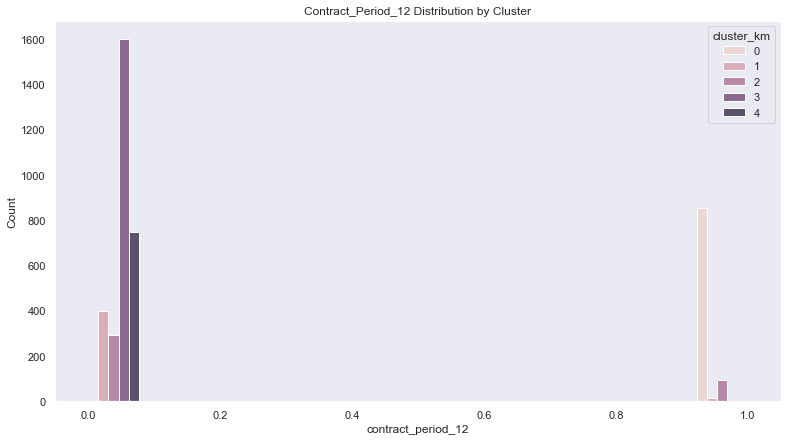

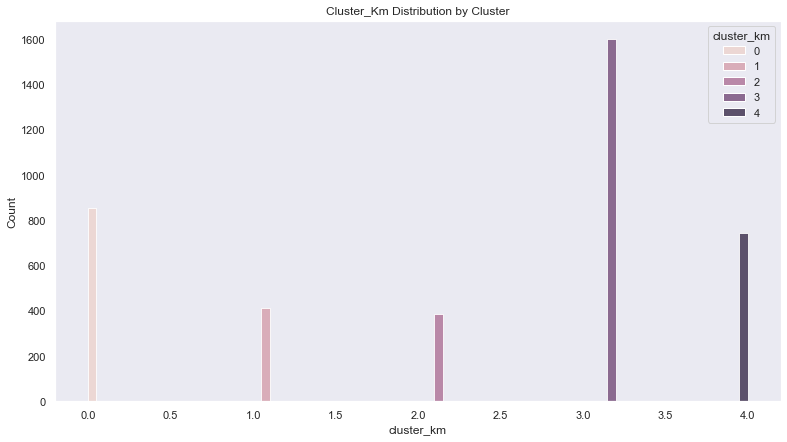

In [30]:
#plot feature distribution by clusters
sns.set_theme(style='dark')
for col in gym_mod_onehot.drop('churn', axis=1).columns:
    fig, ax = plt.subplots(figsize=(13,7))
    sns.histplot(x=col, data=gym_mod_onehot, hue='cluster_km', multiple='dodge').set_title(f'{col.title()} Distribution by Cluster')
    plt.show()

<span style='font-family:sabon;font-size:13pt;'>
    <b><u>Results:</u></b><br>
    We can glean various insights from the plots:
    <ul>
        <li>The near_location feature is heavily biased towards 1 in the clusters 0, and 2-4, meanwhile cluster 1 has 0 in all its near_location values.</li>
        <li>cluster #2 is the only one that contains customers who did not input their phone number.</li>
        <li>Cluster #0 contains very few customers with lifetime of 0, and is heavilty categorized as 12-month contract period</li>
        <li>Cluster #3 is heavily categorizied as 1-month contract period and is the biggest group.</li>
        <li>Cluster #4 is heavily categorizied as 6-month contract period.</li>
    </ul>
</span>

In [31]:
#display feature average for each cluster
gym_mod_onehot.groupby('cluster_km').mean().T


cluster_km,0,1,2,3,4
gender,0.507026,0.512136,0.523316,0.508739,0.509383
near_location,0.947307,0.000000,0.862694,1.000000,0.853887
partner,0.724824,0.419903,0.471503,0.338951,0.576408
promo_friends,0.488290,0.072816,0.305699,0.245318,0.369973
phone,1.000000,1.000000,0.000000,1.000000,1.000000
group_visits,0.548009,0.191748,0.427461,0.382647,0.434316
age,29.866511,28.368932,29.297927,28.863296,29.483914
avg_additional_charges_total,162.220807,133.270584,144.208179,139.817198,153.725675
lifetime,4.687354,2.548544,3.940415,3.280899,4.113941
avg_class_frequency_current_month,2.032660,1.489051,1.723967,1.643313,1.904543


<a id='ML_cluster_conc'></a>
<h3>Conclusion</h3>

<span style='font-family:sabon;font-size:13pt;'>
    <b>Using the Kmeans clustering we produced 5 clusters of customers with various characteristics</b><br><br>
<b>Which cluster is less prone to churn?</b><br>
    <b><u>Cluster #0:</u></b><br>
We see that this cluster has a churn rate of 2.2%<br>
It is characterized by longtime customers (lifetime >4) with a 12 month contract, who live closeby to the gym, attended 2 classes in the last month, are employees of a partnered company, and half of them were brought in by a friend and attend the gym as groups.<br>
<br>
<b>Which cluster is most prone to churn?</b><br>
<b><u>Cluster #1:</u></b><br>
This cluster has a churn rate of 50%<br>
It is characterized by customers who do not live closeby to the gym, most did not come through the friend promotion, mostly do not attend group visits and their contract is for a 1 month period.
</span>

<span style='font-family:sabon;font-size:13pt;'>
    <b>What about the other clusters?</b><br><br>
    <b><u>Cluster #2:</u></b>
    <br>
    With a churn of 27%, this cluster contains a mix of the contract periods, with 53% in 1 month, 23% in 6 month and 24% in 12 month contracts. This cluster contains mostly customers who live nearby the Gym.
    <br>
    <b><u>Cluster #3:</u></b>
    <br>
    <b>With the second highest churn of 40%</b>, this cluster is focused on 1-month contract customers who live close to the gym, with a fairly low average of 1.6 classes attended this month, group_visits, promo_friends and partner are all relatively low for this cluster.
    <br>
    <b><u>Cluster #4:</u></b><br>
    <b>With the second lowest churn of 12%</b>, this cluster is focused on 6-month contract customers who live close to the gym and attended 2 classes this month. over 50% of this clusters customers belong to a partnered company.
    <br>
</span>

<a id='overall_conc'></a>
<h2>Overall Conclusion and Recommendations</h2>

<span style='font-family:sabon;font-size:13pt;'>
   We were tasked with determining the factors that contribute to customer churn in a gym chain.<br>
   We received the relevant data, cleaned it for analysis, we investigated the data features and employed various machine learning algorithms to predict churn of customers and divide customers into groups.<br><br>
   We found that the best algorithm to predict churn in this instance appears to be Logistic Regression.<br>
   We determined that the factors present in the data that contribute most to the churn classification are:<br>
   <ul>
      <b>
         <li>lifetime</li>
         <li>avg_class_frequency_current_month</li>
         <li>age</li>
         <li>contract_period_12</li>
         <li>contract_period_1</li>
      </b>
   </ul>
   We have also created user groups using a clustering algorithm which produced 5 distinct groups.<br>
   Through analysis of the groups we came to several conclusions:<br>
   <ul>
      <li>Customers who sign a contract of 6 to 12 months are much more likely to stay.</li>
      <li>customers who come through the friend promotion are more likely to stay</li>
      <li>customers who live closeby to the gym are more likely to stay</li>
      <li>customers who tend to visit in groups are more likely to stay</li>
   </ul>
</span>

<a id='overall_rec'></a>
<h3>Recommendations</h3>

<span style='font-family:sabon;font-size:13pt;'>
    <b>In light of the conclusions of the analysis we present the following recommendations:</b>
    <ul>
    <li>We suggest a group pickup program for customers who do not live near the gym.<br>This could be used to promote group activity which has been shown to majorly affect churn.<br>It will also contribute to solving two major issues which is distance - shown to be major factor, and lack of motivation which is common in the industry.</li>
    <li>Offer free classes or discount on long term memberships for customers with a 1-month contract, or experiment with a 3-month option and observe churn rates.</li>
    <li>Consider investing more into the friend promotion campaign as the analysis suggests customers who come through friends tend to stay longer.</li>
        <li>Ages 25-29 have shown higher churn rates, and age has been determined to be a possible big factor that decides churn.<br>Therefore promotion campaigns focusing on this age group could prove useful in improving retention.</li>
    </ul>
</span>